In [1]:
#Import Dependencies
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import numpy as np
from collections import Counter 

In [2]:
coded_data=pd.read_csv("../Resources/CodedData.csv")
coded_data.head()

,Unnamed: 0,type_Ereq,type_aband,type_assist,type_stray,type_surr,cond_aged,cond_inj,cond_norm,cond_nurs,...,hound,herding,toy,terrier,pit bull,cur,g_misc,small,med,large
0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,2,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,3,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,4,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0


In [3]:
coded_data.columns

Index(['Unnamed: 0', 'type_Ereq', 'type_aband', 'type_assist', 'type_stray',
       'type_surr', 'cond_aged', 'cond_inj', 'cond_norm', 'cond_nurs',
       'cond_other', 'cond_sick', 'Age_Adult', 'Age_Puppy', 'Age_Senior',
       'Age_Young', 'Month_Apr', 'Month_Aug', 'Month_Dec', 'Month_Feb',
       'Month_Jan', 'Month_July', 'Month_June', 'Month_Mar', 'Month_May',
       'Month_Nov', 'Month_Oct', 'Month_Sep', 'Color_Black',
       'Color_Black/Brown', 'Color_Black/Tan', 'Color_Black/White',
       'Color_Brindle', 'Color_Brown', 'Color_Brown/Tan', 'Color_Brown/White',
       'Color_Gray', 'Color_Gray/White', 'Color_Merle', 'Color_Red',
       'Color_Red/White', 'Color_Sable', 'Color_Tan', 'Color_Tricolor',
       'Color_White', 'mix', 'sex', 'snstatus', 'restrict', 'prior',
       'LongStay', 'sporting', 'working', 'non-sporting', 'hound', 'herding',
       'toy', 'terrier', 'pit bull', 'cur', 'g_misc', 'small', 'med', 'large'],
      dtype='object')

In [4]:
#Define feature set, dropping outcome
X=coded_data.drop(columns="LongStay")
X.columns


Index(['Unnamed: 0', 'type_Ereq', 'type_aband', 'type_assist', 'type_stray',
       'type_surr', 'cond_aged', 'cond_inj', 'cond_norm', 'cond_nurs',
       'cond_other', 'cond_sick', 'Age_Adult', 'Age_Puppy', 'Age_Senior',
       'Age_Young', 'Month_Apr', 'Month_Aug', 'Month_Dec', 'Month_Feb',
       'Month_Jan', 'Month_July', 'Month_June', 'Month_Mar', 'Month_May',
       'Month_Nov', 'Month_Oct', 'Month_Sep', 'Color_Black',
       'Color_Black/Brown', 'Color_Black/Tan', 'Color_Black/White',
       'Color_Brindle', 'Color_Brown', 'Color_Brown/Tan', 'Color_Brown/White',
       'Color_Gray', 'Color_Gray/White', 'Color_Merle', 'Color_Red',
       'Color_Red/White', 'Color_Sable', 'Color_Tan', 'Color_Tricolor',
       'Color_White', 'mix', 'sex', 'snstatus', 'restrict', 'prior',
       'sporting', 'working', 'non-sporting', 'hound', 'herding', 'toy',
       'terrier', 'pit bull', 'cur', 'g_misc', 'small', 'med', 'large'],
      dtype='object')

In [5]:
#Create a subset of features, based on preliminary analysis.
#The Five binary features are included because they include basic demographic information (sex, spay/neuter), 
#or a priori hypothesis of risk (mixed breed, restricted breed, prior encounters)
#Other features were chosen based on preliminary analysis. Very rare features were excluded.
#Given that the split is at the 75th percentile, 25% is the expected proportion for long stays.
#Common features with greater than 5% difference from expected were included in the subset of features.
Xsub=coded_data[["sex","snstatus","restrict","prior","mix","type_surr","cond_inj","pit bull", "cur","non-sporting",
                "toy", "Age_Young","small","large","Color_Brindle","Color_Brown/White","Color_Gray/White",
                "Color_White"]]
Xsub.head()

,sex,snstatus,restrict,prior,mix,type_surr,cond_inj,pit bull,cur,non-sporting,toy,Age_Young,small,large,Color_Brindle,Color_Brown/White,Color_Gray/White,Color_White
0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0


In [6]:
Xsub2=coded_data[["sex","snstatus","restrict","prior","mix","type_surr","cond_inj","pit bull", "cur","non-sporting",
                "toy", "Age_Young","small","large","Color_Brindle","Color_Brown/White","Color_Gray/White",
                "Color_White","type_assist","hound","sporting","terrier","Age_Senior","Color_Black/Tan","Color_Brown/Tan","Color_Tricolor","Month_Nov"]]
Xsub2.head()

,sex,snstatus,restrict,prior,mix,type_surr,cond_inj,pit bull,cur,non-sporting,...,Color_White,type_assist,hound,sporting,terrier,Age_Senior,Color_Black/Tan,Color_Brown/Tan,Color_Tricolor,Month_Nov
0,0,1,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
1,0,1,0,1,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,0,1,0,1,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
4,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1


In [7]:
#Outcome is prolonged length of stay
y=coded_data["LongStay"]

In [8]:
#Split into training and testing sets, using default settings of 75/25 stratified split
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=0)

# Naive Bayes

In [9]:
#Using Bernoulli Naive Bayes because all of our data are categorical, and after dummy coding, entered as 0,1 binary features
from sklearn.naive_bayes import BernoulliNB

NB=BernoulliNB()
NB.fit(X_train, y_train)
predictions = NB.predict(X_test)


In [10]:
print("Accuracy score (training): {0:.3f}".format(
    NB.score(X_train,y_train)))
print("Accuracy score (validation): {0:.3f}".format(
    NB.score(X_test,y_test)))
print(classification_report(y_test, predictions))

Accuracy score (training): 0.704
Accuracy score (validation): 0.701
              precision    recall  f1-score   support

           0       0.79      0.81      0.80     13454
           1       0.43      0.39      0.41      4877

    accuracy                           0.70     18331
   macro avg       0.61      0.60      0.61     18331
weighted avg       0.69      0.70      0.70     18331



In [11]:
#Create confusion matrix for Naive Bayes
cm=confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(cm,index = ["Actual 0", "Actual 1"], 
                      columns=["Predicted 0", "Predicted 1"])
cm_df

,Predicted 0,Predicted 1
Actual 0,10928,2526
Actual 1,2960,1917


# Generate permutation feature importance

In [12]:
from sklearn.inspection import permutation_importance

imps = permutation_importance(NB, X_test, y_test)
importances = imps.importances_mean
std = imps.importances_std
indices = np.argsort(importances)[::-1]
features=X.columns

# Print the feature ranking
print("Feature ranking:")
for f in range(X_test.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))

Feature ranking:
1. cond_norm (0.004692)
2. cond_nurs (0.004277)
3. cond_inj (0.003404)
4. Age_Puppy (0.003066)
5. type_surr (0.002433)
6. med (0.001811)
7. Color_Black/Tan (0.001593)
8. Age_Young (0.001506)
9. type_assist (0.001167)
10. mix (0.001091)
11. Color_Tan (0.000709)
12. cond_other (0.000633)
13. Month_June (0.000556)
14. Month_May (0.000535)
15. Color_White (0.000447)
16. Color_Gray (0.000338)
17. Month_Apr (0.000327)
18. Age_Adult (0.000316)
19. sporting (0.000262)
20. cond_sick (0.000251)
21. sex (0.000218)
22. working (0.000218)
23. Color_Brindle (0.000218)
24. Color_Black/Brown (0.000164)
25. cond_aged (0.000109)
26. Month_Oct (0.000098)
27. g_misc (0.000087)
28. Color_Brown/Tan (0.000055)
29. Month_Nov (0.000044)
30. type_Ereq (0.000000)
31. Unnamed: 0 (0.000000)
32. Color_Sable (-0.000011)
33. Color_Brown/White (-0.000022)
34. Color_Gray/White (-0.000022)
35. Month_July (-0.000044)
36. Age_Senior (-0.000065)
37. Color_Black/White (-0.000076)
38. Month_Sep (-0.000076)
3

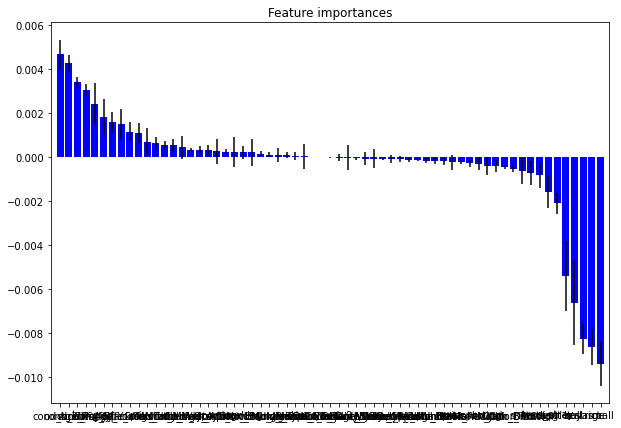

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.title("Feature importances")
plt.bar(range(X_test.shape[1]), importances[indices], color="b", yerr=std[indices], align="center")
plt.xticks(range(X_test.shape[1]), [features[indices[i]] for i in range(63)])
plt.xlim([-1, X_test.shape[1]])
plt.show()

In [ ]:
#Use restrictive subset of features
X_train, X_test, y_train, y_test=train_test_split(Xsub,y,random_state=0)

In [ ]:
#Create classifier
NB=BernoulliNB()
NB.fit(X_train, y_train)
predictions = NB.predict(X_test)
print("Accuracy score (training): {0:.3f}".format(
    NB.score(X_train,y_train)))
print("Accuracy score (validation): {0:.3f}".format(
    NB.score(X_test,y_test)))
print(classification_report(y_test, predictions))

In [ ]:
#Create confusion matrix
cm=confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(cm,index = ["Actual 0", "Actual 1"], 
                      columns=["Predicted 0", "Predicted 1"])
cm_df

In [ ]:
#Use less restrictive subset of features
X_train, X_test, y_train, y_test=train_test_split(Xsub2,y,random_state=0)

In [ ]:
#Create classifier
NB=BernoulliNB()
NB.fit(X_train, y_train)
predictions = NB.predict(X_test)
print("Accuracy score (training): {0:.3f}".format(
    NB.score(X_train,y_train)))
print("Accuracy score (validation): {0:.3f}".format(
    NB.score(X_test,y_test)))
print(classification_report(y_test, predictions))

In [ ]:
#Create confusion matrix
cm=confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(cm,index = ["Actual 0", "Actual 1"], 
                      columns=["Predicted 0", "Predicted 1"])
cm_df

# Try oversampling with SMOTE

In [ ]:

from imblearn.over_sampling import SMOTE
from sklearn.metrics import balanced_accuracy_score
from imblearn.metrics import classification_report_imbalanced

In [ ]:
#Use SMOTE to oversample data
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=0)
X_resampled, y_resampled = SMOTE(random_state=1, sampling_strategy='auto').fit_resample(
    X_train, y_train
)
Counter(y_resampled)

In [ ]:

NB=BernoulliNB()
NB.fit(X_resampled, y_resampled)
predictions = NB.predict(X_test)


In [ ]:
print("Accuracy score (training): {0:.3f}".format(
    NB.score(X_resampled,y_resampled)))
print("Accuracy score (validation): {0:.3f}".format(
    NB.score(X_test,y_test)))
print(classification_report_imbalanced(y_test, predictions))

In [ ]:
#Create confusion matrix for Naive Bayes
cm=confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(cm,index = ["Actual 0", "Actual 1"], 
                      columns=["Predicted 0", "Predicted 1"])
cm_df

# SMOTEENN

In [ ]:
from imblearn.combine import SMOTEENN 
sme = SMOTEENN(random_state=0)
X_res, y_res = sme.fit_resample(X_train, y_train)
Counter(y_res)

In [ ]:
NB=BernoulliNB()
NB.fit(X_res, y_res)
predictions = NB.predict(X_test)
cm=confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(cm, index = ["Actual 0", "Actual 1"], 
                      columns=["Predicted 0", "Predicted 1"])
cm_df

In [ ]:
# Score the model
print("Accuracy score (training): {0:.3f}".format(
    NB.score(X_res,y_res)))
print("Accuracy score (validation): {0:.3f}".format(
    NB.score(X_test,y_test)))
print("Balanced accuracy score: {0:.3f}".format( 
        balanced_accuracy_score(y_test, predictions)))
print(classification_report_imbalanced(y_test, predictions))